## 1. 데이터 읽기

필요한 패키지 설치 및 import한 후 pandas를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

In [ ]:
1.1 데이터 불러오기
서울시 공공데이터 포털에서 받아온 <서울시 화재발생 현황 (구별) 통계> 데이터를 읽고
어떠한 데이터가 저장되어 있는지 확인.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

data = pd.read_csv('./fire(2).csv',encoding = "euc-kr")
fire = data

print(fire.shape)

# 상위 5개 데이터만 출력
fire.head(50)

['NanumGothic']
(28, 4)


,동별(1),동별(2),2020년,2021년
0,동별(1),동별(2),발생,발생
1,동별(1),동별(2),실화,실화
2,합계,소계,4523,4399
3,합계,종로구,179,169
4,합계,중구,170,136
5,합계,용산구,176,160
6,합계,성동구,155,163
7,합계,광진구,169,187
8,합계,동대문구,120,131
9,합계,중랑구,204,191


### 1.2 데이터 삭제
불필요한 행과 열에 대해서 drop을 사용하여 삭제

In [5]:
fire.head()

,동별(1),동별(2),2020년,2021년
1,동별(1),동별(2),실화,실화
2,합계,소계,4523,4399
3,합계,종로구,179,169
4,합계,중구,170,136
5,합계,용산구,176,160


In [7]:
fire.drop(1, axis = 0)
fire = fire.drop(1, axis = 0)

In [8]:
fire.head()

,동별(1),동별(2),2020년,2021년
2,합계,소계,4523,4399
3,합계,종로구,179,169
4,합계,중구,170,136
5,합계,용산구,176,160
6,합계,성동구,155,163


In [9]:
fire.drop(2, axis = 0)
fire = fire.drop(2, axis = 0)

In [10]:
fire.drop('동별(1)', axis = 1)
fire = fire.drop('동별(1)', axis = 1)

In [11]:
fire.head()

,동별(2),2020년,2021년
3,종로구,179,169
4,중구,170,136
5,용산구,176,160
6,성동구,155,163
7,광진구,169,187


### 1.3 rename을 사용하여 열 이름 변경

'동별(2)' 라는 열을 '구별' 로 변경하여 저장

In [12]:
fire.rename(columns={'동별(2)':'구별'})
fire = fire.rename(columns={'동별(2)':'구별'})

In [13]:
fire.head()

,구별,2020년,2021년
3,종로구,179,169
4,중구,170,136
5,용산구,176,160
6,성동구,155,163
7,광진구,169,187


### 1.4 데이터 정보 확인

In [14]:
print("데이터 크기")
print(fire.shape)

print()
print("데이터 정보")
print(fire.info())

print()
print("결측값 확인")
print(fire.isnull().sum())

데이터 크기
(25, 3)

데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 3 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   2020년   25 non-null     object
 2   2021년   25 non-null     object
dtypes: object(3)
memory usage: 732.0+ bytes
None

결측값 확인
구별       0
2020년    0
2021년    0
dtype: int64


### 1.5 데이터 정렬
2020년 2021년 열에 대해서 오름차순으로 정렬.

In [15]:
fire.sort_values(by = ['2020년','2021년'],ascending=[True,True])
fire = fire.sort_values(by = ['2020년','2021년'],ascending=[True,True])

In [16]:
fire.head()

,구별,2020년,2021년
20,금천구,108,108
8,동대문구,120,131
22,동작구,136,121
12,도봉구,136,125
17,양천구,137,138


### 1.6 데이터 형식 확인 및 변경
2020년,2021년 열에 대한 숫자값이 모두 object로 되어있는 것을 확인하고
시각화를 위해서 int 값으로 변경

In [17]:
fire.dtypes

구별       object
2020년    object
2021년    object
dtype: object

In [18]:
fire = fire.astype({'2020년':'int'})
fire

,구별,2020년,2021년
20,금천구,108,108
8,동대문구,120,131
22,동작구,136,121
12,도봉구,136,125
17,양천구,137,138
19,구로구,142,147
10,성북구,147,153
13,노원구,152,154
6,성동구,155,163
11,강북구,165,130


In [19]:
fire = fire.astype({'2021년':'int'})
fire

,구별,2020년,2021년
20,금천구,108,108
8,동대문구,120,131
22,동작구,136,121
12,도봉구,136,125
17,양천구,137,138
19,구로구,142,147
10,성북구,147,153
13,노원구,152,154
6,성동구,155,163
11,강북구,165,130


In [20]:
fire.dtypes

구별       object
2020년     int32
2021년     int32
dtype: object

### 1.7 구별로 합과 평균
평균값을 시각화하기 위해서 구별로 2년치 총합을 구해서 평균값을 계산

In [21]:
fire['2년치 합'] = fire['2020년'] + fire['2021년']
fire['2년치 평균'] = fire['2년치 합'] / 2

In [22]:
fire.dtypes

구별         object
2020년       int32
2021년       int32
2년치 합       int32
2년치 평균    float64
dtype: object

# 2. 데이터 시각화
matplotlib를 사용하여 막대그래프를 만들어서
구별로 평균값을 그래프로 나타냄

['Malgun Gothic']


(0.0, 400.0)

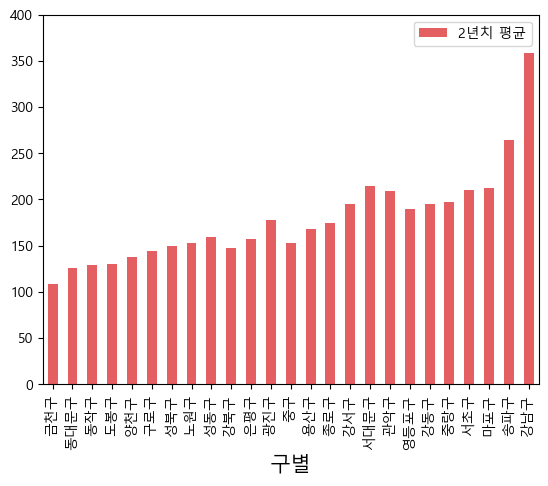

In [32]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

fire.plot(x='구별',y='2년치 평균',kind='bar', fontsize = 10 , color='#e35f62')
plt.xlabel('구별',fontsize = 15 , rotation = 0)
plt.ylim([0, 400])